In [ ]:
# 데이터 준비
from tensorflow.keras.datasets import cifar10 # 케라스 데이터셋 cifar10 데이터 사용용

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


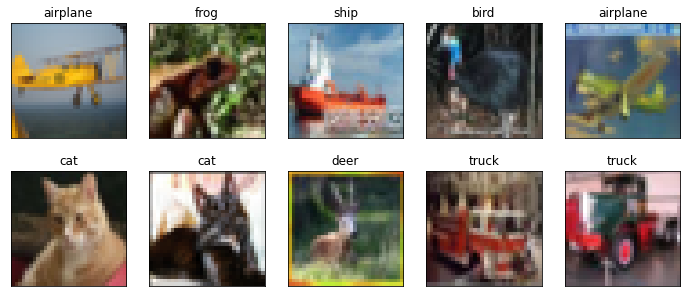

In [ ]:
# 데이터 표시
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples = np.random.randint(len(X_train), size=10) 

plt.figure(figsize=(12, 5))

for i, idx in enumerate(samples):
  plt.subplot(2, 5, i+1, xticks=[], yticks=[])
  plt.title((class_names[y_train[idx][0]]))
  plt.imshow(X_train[idx])

plt.show()

In [ ]:
# 정규화 처리 
# 최대 - 최소 정규화 처리
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# 검증용 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
 X_train, y_train, test_size = 0.3, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


(35000, 32, 32, 3) (35000, 1)
(15000, 32, 32, 3) (15000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
y_train = y_train.reshape(-1)
y_val = y_val.reshape(-1)
y_test = y_test.reshape(-1)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(35000,)
(15000,)
(10000,)


In [ ]:
import tensorflow as tf
y_train_oh = tf.one_hot(y_train, depth=10)
y_val_oh = tf.one_hot(y_val, depth=10)
y_test_oh = tf.one_hot(y_test, depth=10)
print(y_train_oh.shape)
y_train_oh[:5]


(35000, 10)


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# 넘파이 배열로 변환
# 모델의 입력 데이터로 사용하기 위해서 넘파이의 ndarray 타입으로 변경
y_train_oh = y_train_oh.numpy()
y_val_oh = y_val_oh.numpy()
y_test_oh = y_test_oh.numpy()
print(y_train_oh.shape)
print(y_val_oh.shape)
print(y_test_oh.shape)

(35000, 10)
(15000, 10)
(10000, 10)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()

  model.add(layers.Conv2D(32, 3, padding = 'same', activation='relu', input_shape = (32, 32, 3)))
  model.add(layers.MaxPooling2D(2))
  model.add(layers.Dropout(0.3))
  
  model.add(layers.Conv2D(64, 3, padding = 'same', activation='relu'))
  model.add(layers.MaxPooling2D(2))
  model.add(layers.Dropout(0.3))
  
  model.add(layers.Conv2D(256, 3, padding = 'same', activation='relu'))
  model.add(layers.MaxPooling2D(2))
  model.add(layers.Dropout(0.3))
  
  model.add(layers.Conv2D(256, 3, padding = 'same', activation='relu'))
  model.add(layers.MaxPooling2D(2))
  model.add(layers.Dropout(0.3))
  model.add(layers.Flatten())
  
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  
  return model


In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam,
 loss = 'categorical_crossentropy', 
 metrics=['acc'])
EPOCHS = 100
BATCH_SIZE = 256
history = model.fit(X_train, y_train_oh,
 epochs = EPOCHS,
 batch_size = BATCH_SIZE,
 validation_data = (X_val, y_val_oh))

Epoch 1/100
137/137 [==============================] - 14s 29ms/step - loss: 2.1767 - acc: 0.1835 - val_loss: 2.0625 - val_acc: 0.2335
Epoch 2/100
137/137 [==============================] - 3s 23ms/step - loss: 1.9227 - acc: 0.2989 - val_loss: 2.0561 - val_acc: 0.2261
Epoch 3/100
137/137 [==============================] - 4s 28ms/step - loss: 1.7834 - acc: 0.3515 - val_loss: 1.9367 - val_acc: 0.2837
Epoch 4/100
137/137 [==============================] - 4s 29ms/step - loss: 1.7004 - acc: 0.3821 - val_loss: 1.8992 - val_acc: 0.2972
Epoch 5/100
137/137 [==============================] - 4s 27ms/step - loss: 1.6374 - acc: 0.4013 - val_loss: 1.7142 - val_acc: 0.3772
Epoch 6/100
137/137 [==============================] - 3s 25ms/step - loss: 1.5815 - acc: 0.4219 - val_loss: 1.6436 - val_acc: 0.4079
Epoch 7/100
137/137 [==============================] - 4s 26ms/step - loss: 1.5313 - acc: 0.4380 - val_loss: 1.6124 - val_acc: 0.4169
Epoch 8/100
137/137 [==============================] - 4s 26m

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
def plot_history(history):
 hist = pd.DataFrame(history.history)
 hist['epoch'] = history.epoch
 plt.figure(figsize=(16,8))
 plt.subplot(1,2,1)
 plt.xlabel('Epoch')
 plt.ylabel('Loss')
 plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
 plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
 plt.legend()
 plt.subplot(1,2,2)
 plt.xlabel('Epoch')
 plt.ylabel('Accuracy')
 plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
 plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
 plt.legend()
 plt.show()

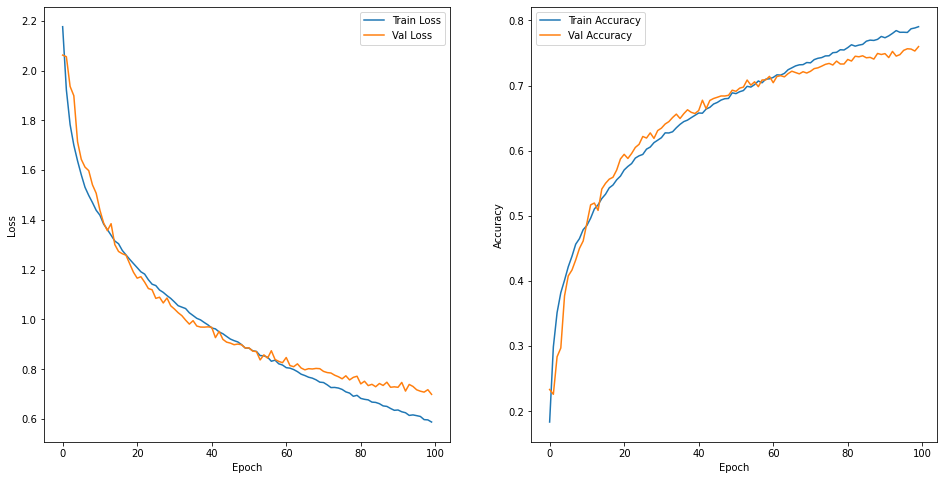

In [ ]:
plot_history(history)

In [ ]:
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_matrix(y_test, y_pred):
  plt.figure(figsize = (10, 8))
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
  plt.xlabel('predicted label', fontsize = 15)
  plt.ylabel('true label', fontsize = 15)
  plt.show()

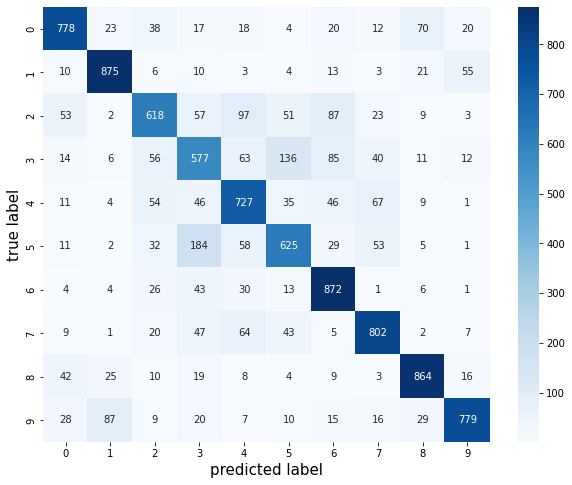

In [ ]:
plot_matrix(y_test, y_pred_argmax)

In [ ]:
# 평가 지표 계산
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def print_score(y_test, y_pred):
  print('accuracy: %.3f' % (accuracy_score(y_test, y_pred)))
  print('precision: %.3f' % (precision_score(y_test, y_pred, 
  average='macro')))
  print('recall_score: %.3f' % (recall_score(y_test, y_pred, 
  average='macro')))
  print('f1_score: %.3f' % (f1_score(y_test, y_pred, 
  average='macro')))

In [ ]:
print_score(y_test,y_pred_argmax)

accuracy: 0.752
precision: 0.753
recall_score: 0.752
f1_score: 0.751


## 콜백
모델을 학습하면서 성능이 향상될 때마다 그 상태를 파일로 저장하는 기능인 ModelCheckpoint 콜백을 사용하는 방법을 확인한다

In [ ]:
# 모델 준비
model = build_model()
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam,
 loss = 'categorical_crossentropy', 
 metrics=['acc'])

In [ ]:
# 콜백 준비
from tensorflow.keras import callbacks
checkpoint_path = 'temp/cifar_10.ckpt'
checkpoint = callbacks.ModelCheckpoint(checkpoint_path, 
 save_weights_only=True, 
 save_best_only=True, 
 monitor='val_acc')

In [ ]:
# 모델 학습습
EPOCHS = 100
BATCH_SIZE = 256
history = model.fit(X_train, y_train_oh,
 epochs = EPOCHS,
 batch_size = BATCH_SIZE,
 validation_data = (X_val, y_val_oh),
 callbacks=[checkpoint])

Epoch 1/100
137/137 [==============================] - 3s 23ms/step - loss: 0.5838 - acc: 0.7944 - val_loss: 0.7131 - val_acc: 0.7545
Epoch 2/100
137/137 [==============================] - 3s 19ms/step - loss: 0.5838 - acc: 0.7945 - val_loss: 0.7087 - val_acc: 0.7565
Epoch 3/100
137/137 [==============================] - 3s 19ms/step - loss: 0.5884 - acc: 0.7928 - val_loss: 0.7082 - val_acc: 0.7568
Epoch 4/100
137/137 [==============================] - 3s 19ms/step - loss: 0.5783 - acc: 0.7958 - val_loss: 0.7036 - val_acc: 0.7564
Epoch 5/100
137/137 [==============================] - 3s 19ms/step - loss: 0.5685 - acc: 0.7991 - val_loss: 0.7196 - val_acc: 0.7547
Epoch 6/100
137/137 [==============================] - 3s 20ms/step - loss: 0.5689 - acc: 0.7975 - val_loss: 0.7133 - val_acc: 0.7558
Epoch 7/100
137/137 [==============================] - 3s 19ms/step - loss: 0.5647 - acc: 0.7994 - val_loss: 0.6951 - val_acc: 0.7604
Epoch 8/100
137/137 [==============================] - 3s 19ms

In [ ]:
# 상태 복원
model.load_weights(checkpoint_path)

In [ ]:
# 예측
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=1)
print_score(y_test, y_pred_argmax)


313/313 [==============================] - 1s 2ms/step
accuracy: 0.774
precision: 0.773
recall_score: 0.774
f1_score: 0.772


In [ ]:
def build_model_bach_normalization():
  model = keras.Sequential()
  model.add(layers.Conv2D(32, 3, padding = 'same', input_shape = 
  (32, 32, 3)))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(2))
  model.add(layers.Conv2D(64, 3, padding = 'same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(2))
  model.add(layers.Conv2D(256, 3, padding = 'same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(2))
  model.add(layers.Conv2D(256, 3, padding = 'same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Activation('relu'))
  model.add(layers.MaxPooling2D(2))
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  return model

In [ ]:
model = build_model_bach_normalization()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)      

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam,
 loss = 'categorical_crossentropy',
 metrics=['acc'])

In [ ]:
EPOCHS = 100
BATCH_SIZE = 256
history = model.fit(X_train, y_train_oh,
 epochs = EPOCHS,
 batch_size = BATCH_SIZE,
 validation_data = (X_val, y_val_oh))

Epoch 1/100
137/137 [==============================] - 5s 24ms/step - loss: 1.5231 - acc: 0.4619 - val_loss: 2.6120 - val_acc: 0.1615
Epoch 2/100
137/137 [==============================] - 3s 21ms/step - loss: 1.1194 - acc: 0.6087 - val_loss: 2.5207 - val_acc: 0.2250
Epoch 3/100
137/137 [==============================] - 3s 21ms/step - loss: 0.9385 - acc: 0.6792 - val_loss: 1.9965 - val_acc: 0.3103
Epoch 4/100
137/137 [==============================] - 3s 21ms/step - loss: 0.8025 - acc: 0.7335 - val_loss: 1.3818 - val_acc: 0.5171
Epoch 5/100
137/137 [==============================] - 3s 21ms/step - loss: 0.6921 - acc: 0.7715 - val_loss: 1.1821 - val_acc: 0.5935
Epoch 6/100
137/137 [==============================] - 3s 21ms/step - loss: 0.5949 - acc: 0.8088 - val_loss: 1.0070 - val_acc: 0.6545
Epoch 7/100
137/137 [==============================] - 3s 23ms/step - loss: 0.5021 - acc: 0.8462 - val_loss: 0.9605 - val_acc: 0.6705
Epoch 8/100
137/137 [==============================] - 3s 21ms

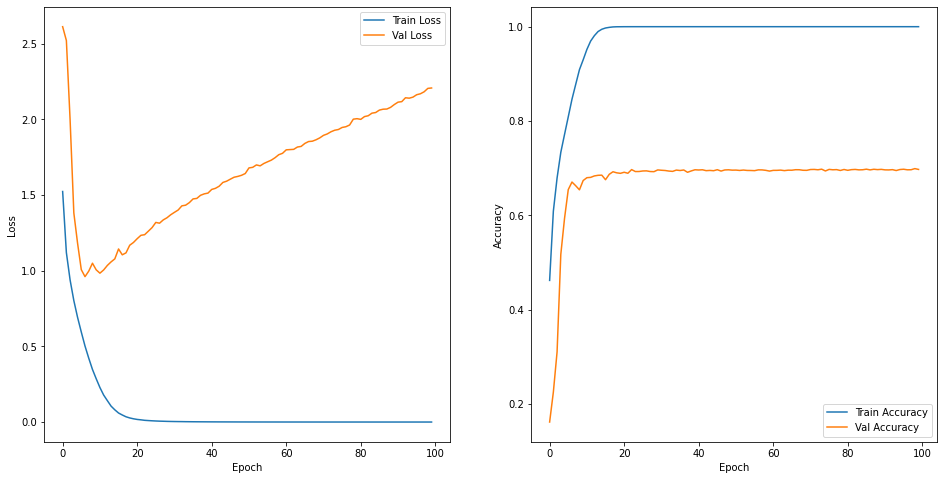

In [ ]:
plot_history(history)

In [ ]:
loss, acc = model.evaluate(X_test, y_test_oh)
print('loss : ', loss)
print('acc : ', acc)

313/313 [==============================] - 1s 4ms/step - loss: 2.3031 - acc: 0.6887
loss :  2.3030683994293213
acc :  0.6887000203132629
